In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


import the library we need

In [16]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

There are two ways to build a neural network.

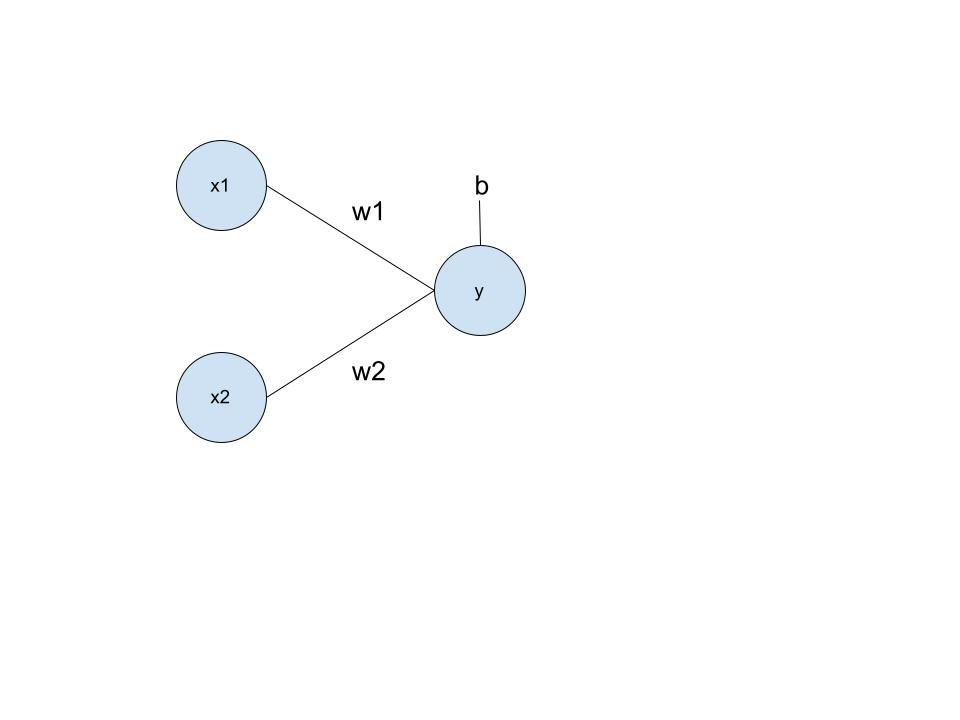

In [112]:
model_1 = Sequential([
    Dense(1, input_dim=2)])

In [20]:
model_2 = Sequential()
model_2.add(Dense(1, input_dim=2))

We can see from the .summary() that there is no difference between these two ways.

In [21]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [116]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


##Loss function (error between the true values and the predict values)

1. Regression problem

In [118]:
#assume we have y_true and y_predict
y_true = np.array([1,2,3,4])
y_predict = np.array([0,1,2,4])

in this case we use the loss: mean squared error (MSE).

In [119]:
def mse(y_true, y_predict):
  loss = np.mean(np.square(y_true - y_predict))
  return loss

In [120]:
loss = mse(y_true, y_predict)
print(loss)

0.75


2. Binary classification problem

In [121]:
#assume we have y_true and y_predict
y_true = np.array([1,1,0,0])
y_predict = np.array([0.9,0.7,0.1,0.4])

in this case we use binary cross entropy

In [122]:
def binary_ce(y_true, y_predict):
  loss = -np.mean(y_true * np.log(y_predict) + (1 - y_true) * np.log(1 - y_predict))
  return loss

In [123]:
loss = binary_ce(y_true, y_predict)
print(loss)

0.2695553997550939


let's see what will happen in four extreme cases.

In [124]:
y_true = np.array([1])
y_predict = np.array([0])
loss = binary_ce(y_true, y_predict)
print(loss)

inf


<ipython-input-122-3e42889cd178>:2: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y_true * np.log(y_predict) + (1 - y_true) * np.log(1 - y_predict))


In [125]:
y_true = np.array([1])
y_predict = np.array([0.9999999999])
loss = binary_ce(y_true, y_predict)
print(loss)

1.000000082790371e-10


In [126]:
y_true = np.array([0])
y_predict = np.array([1])
loss = binary_ce(y_true, y_predict)
print(loss)

inf


<ipython-input-122-3e42889cd178>:2: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y_true * np.log(y_predict) + (1 - y_true) * np.log(1 - y_predict))


In [127]:
y_true = np.array([0])
y_predict = np.array([0.0000000001])
loss = binary_ce(y_true, y_predict)
print(loss)

1.000000082790371e-10


##Train a network

In [252]:
X = np.concatenate([np.random.rand(50, 2) * 0.2, np.random.rand(50, 2) * 0.2 + 0.8])
Y = np.concatenate([np.zeros(50), np.ones(50)])

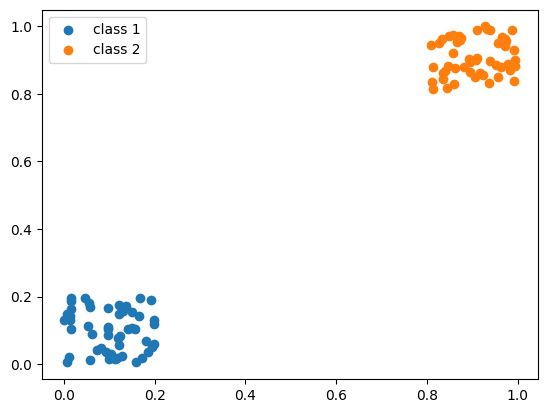

In [253]:
plt.scatter(X[0:50,0],X[0:50,1],label='class 1')
plt.scatter(X[50:100,0],X[50:100,1],label='class 2')
plt.legend()
plt.show()

In [255]:
model_example = Sequential([
    Dense(1,input_dim=2, activation='sigmoid')  #we will talk about this activation later
])

model_example.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_example.fit(X, Y, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5483 - accuracy: 0.5900
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5471 - accuracy: 0.5900
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5459 - accuracy: 0.6100
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5447 - accuracy: 0.6100
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5436 - accuracy: 0.6200
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5425 - accuracy: 0.6200
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5413 - accuracy: 0.6200
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5402 - accuracy: 0.6200
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5391 - accuracy: 0.6300
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5380 - accuracy: 0.6300
Epoch 11/100
4/4 [===========

In [256]:
weights=model_example.get_weights()

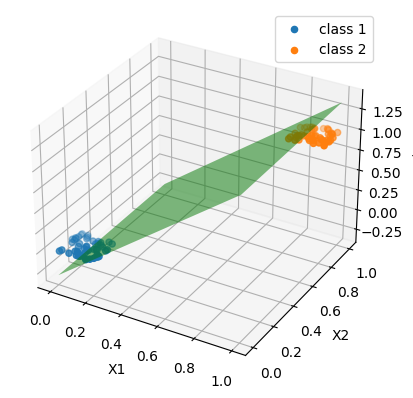

In [257]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')



ax.scatter(X[0:50,0],X[0:50,1],Y[0:50],label='class 1')
ax.scatter(X[50:100,0],X[50:100,1],Y[50:100],label='class 2')


def plane_func(x1, x2, weights):
    return weights[0][0]*x1 + weights[0][1]*x2 + weights[1]


x = np.linspace(0,1,10)
y = np.linspace(0,1,10)
X1, X2 = np.meshgrid(x, y)
Y1 = plane_func(X1, X2, weights)


ax.plot_surface(X1, X2, Y1, alpha=0.5,color='green', rstride=100, cstride=100)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.legend()
plt.show()


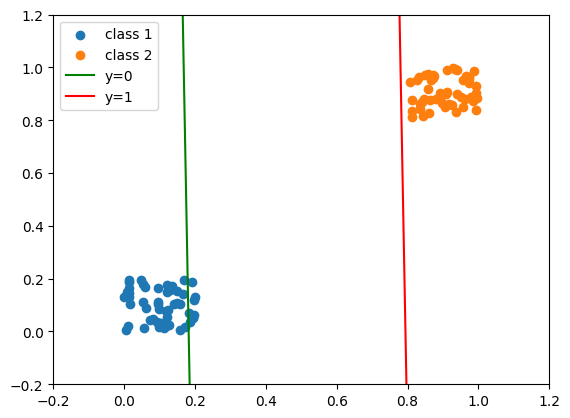

In [271]:
plt.scatter(X[0:50,0],X[0:50,1],label='class 1')
plt.scatter(X[50:100,0],X[50:100,1],label='class 2')

x = np.linspace(0,1,10)

#weights[0][0]*x + weights[0][1]*x2 + weights[1]=0

plt.plot(x,(- weights[0][0]*x  - weights[1])/weights[0][1],color='green',label='y=0')
plt.plot(x,(1 - weights[0][0]*x  - weights[1])/weights[0][1],color='red',label='y=1')

plt.xlim(-0.2,1.2)
plt.ylim(-0.2,1.2)
plt.legend()
plt.show()

##Activation function

Why we add activation function?

-- To solve the non-linear problem

This first comes up when trying to solve the XOR problem

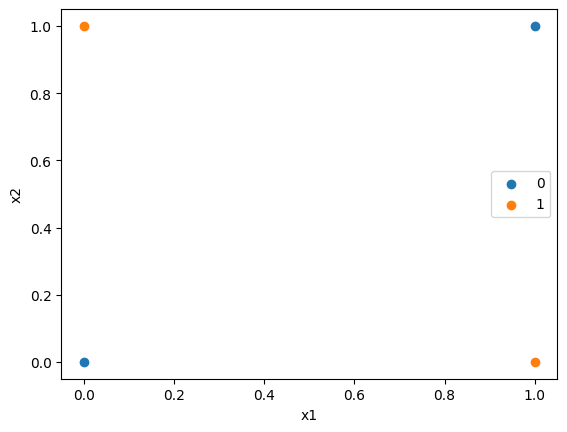

In [215]:
x = [0,1]
y1 = [0,1]
y2 = [1,0]
plt.scatter(x,y1,label='0')
plt.scatter(x,y2,label='1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

common activation functions:

Sigmoid function

In [216]:
def sigmoid(x):
  y = 1/(1 + np.exp(-x))
  return y

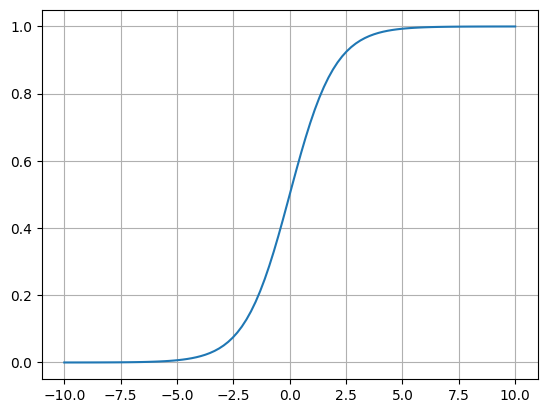

In [217]:
x = np.linspace(-10, 10, 100)
plt.plot(x,sigmoid(x))
plt.grid(True)
plt.show()

ReLU function

In [218]:
def relu(x):
  y = np.maximum(0,x)
  return y

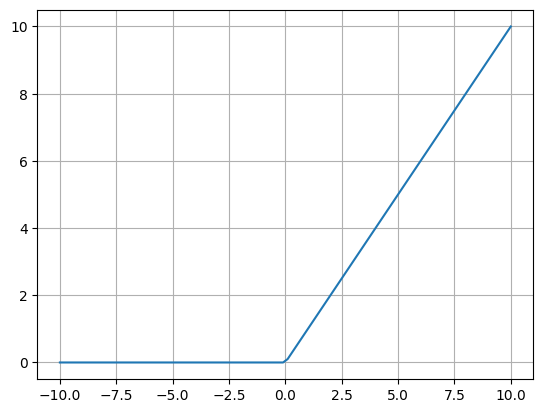

In [219]:
x = np.linspace(-10, 10, 100)
plt.plot(x,relu(x))
plt.grid(True)
plt.show()

tanh function

In [220]:
def tanh(x):
  y = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
  return y

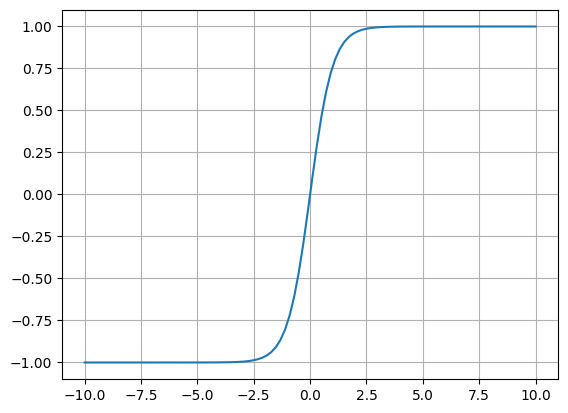

In [221]:
x = np.linspace(-10, 10, 100)
plt.plot(x,tanh(x))
plt.grid(True)
plt.show()

In binary classification case, we add sigmoid function to the output also to limit it within 0 to 1.

How to add activation function in keras?

In [222]:
model_activation = Sequential([
    Dense(1, input_dim=2, activation='sigmoid')])

In [223]:
model_activation.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
